# Polynomial Curve Fitting

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

### Define the True Function and Generate the Sample Data

In [3]:
def f(x):
    return math.sin(x)
print(f(math.pi / 2))

1.0


In [4]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

In [5]:
num_points = 10

In [6]:
train = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

In [7]:
test = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

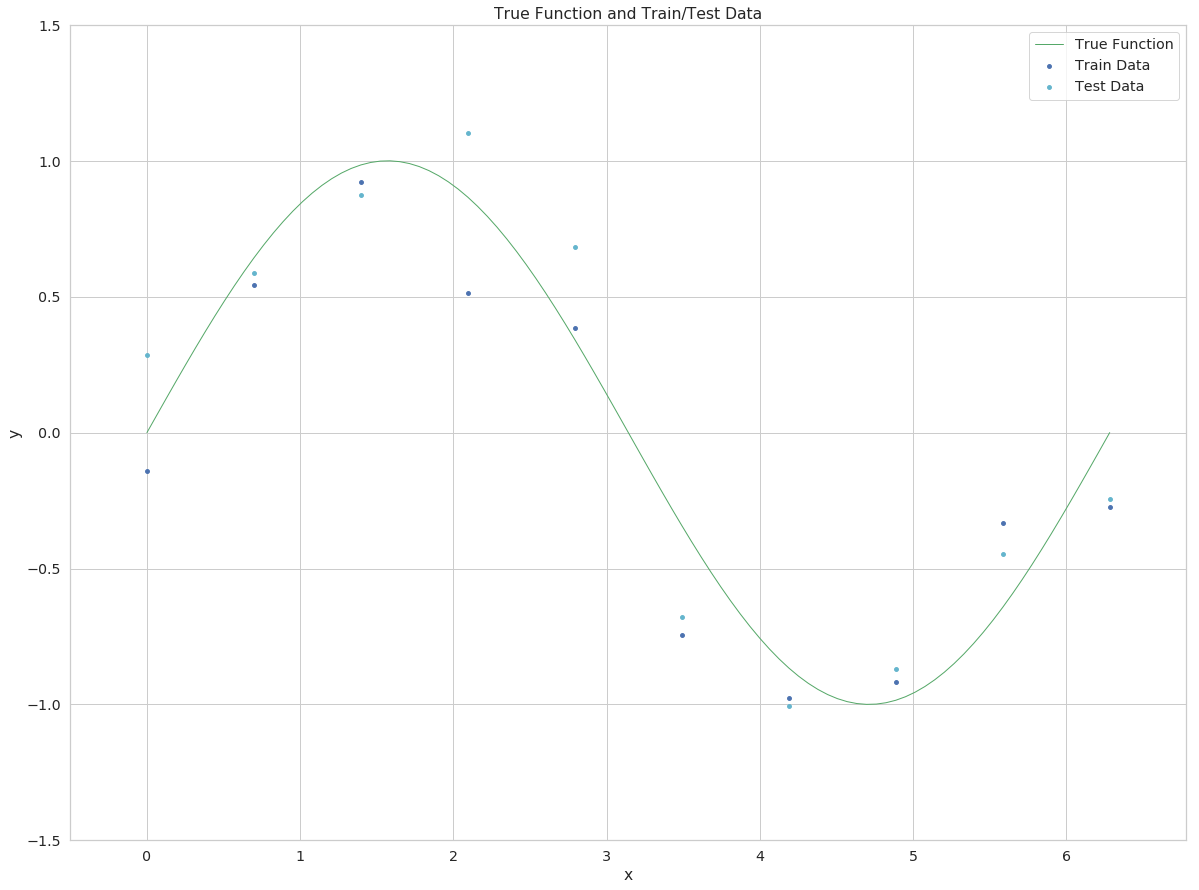

In [8]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=dotsize, label='Test Data')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True Function and Train/Test Data')
_ = plt.legend(loc='upper right')

### Implement Polynomial Curve Fitting

In [9]:
def error(x, y, poly):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s

In [10]:
def regularized_error(x, y, poly, reg_coeff):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s + 0.5 * reg_coeff * np.dot(poly, poly)

### Degree = 1

 
-0.1922 x + 0.5015
error on train:       1.2614107414665587
reg. error on train:  1.2628528568475907
error on test:        1.5981444586763014
reg. error on test:   1.5995865740573334


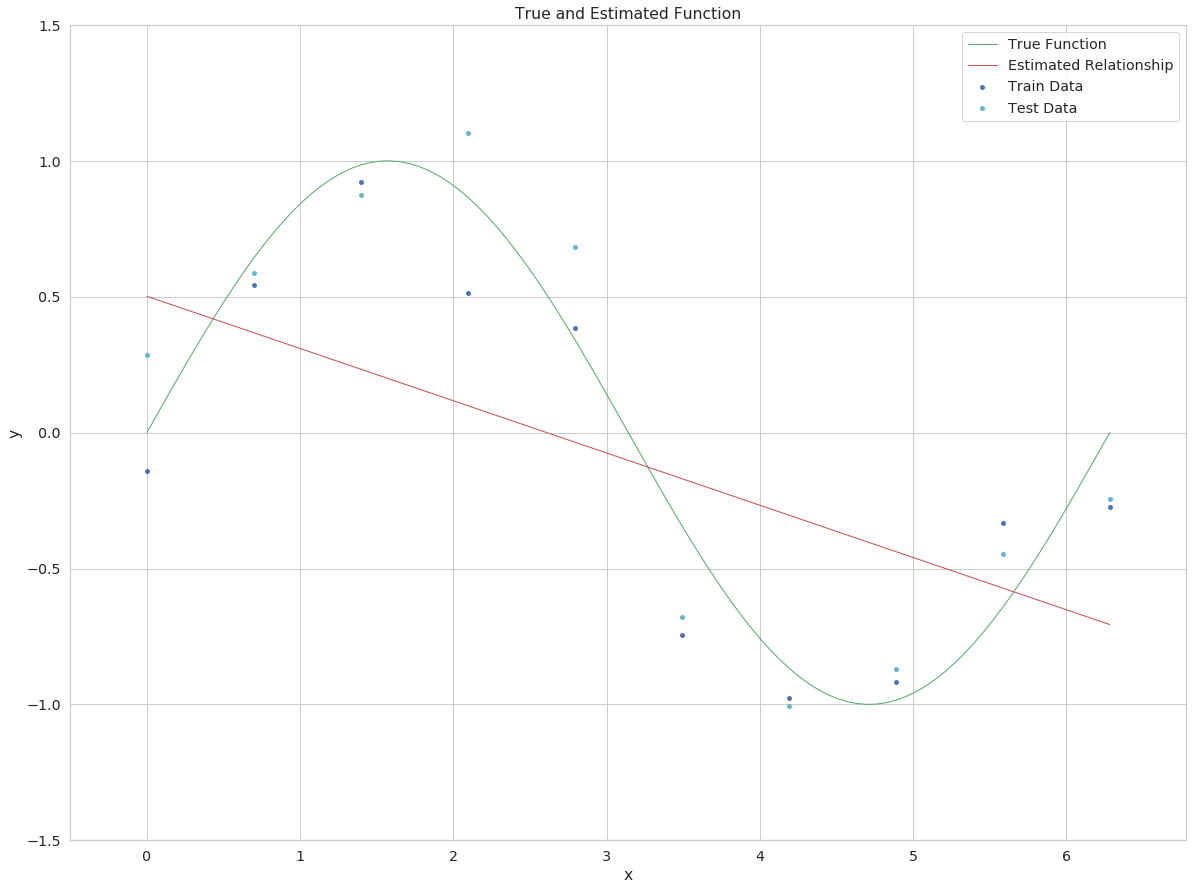

In [11]:
degree = 1
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=dotsize, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Degree = 3

         3          2
0.07467 x - 0.6979 x + 1.448 x - 0.1041
error on train:       0.2621547187512508
reg. error on train:  0.27516062915596723
error on test:        0.5388173211534801
reg. error on test:   0.5518232315581966


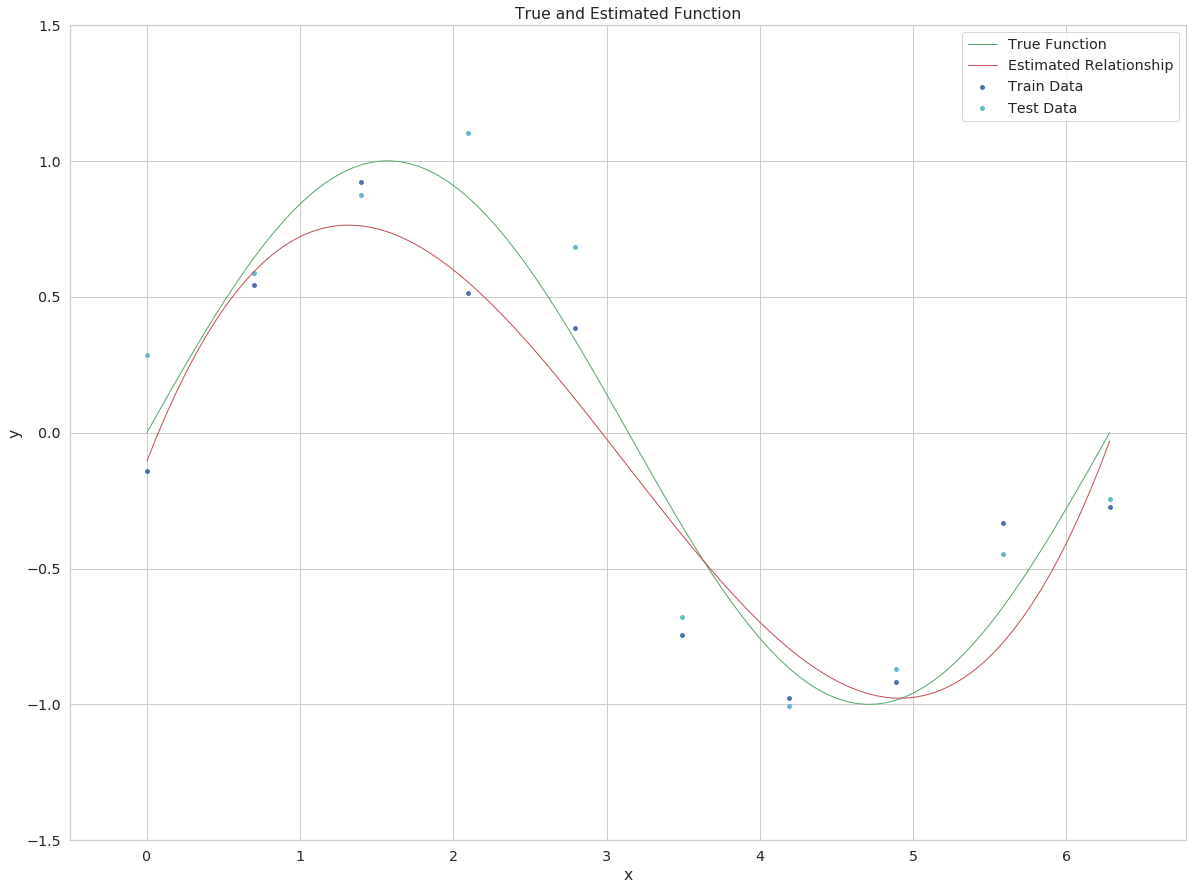

In [12]:
degree = 3
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=dotsize, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Degree = 9

           9          8         7         6         5         4
-0.005254 x + 0.1499 x - 1.797 x + 11.76 x - 45.57 x + 106.1 x
          3         2
 - 143.3 x + 100.4 x - 26.31 x - 0.1406
error on train:       4.832432910614966e-20
reg. error on train:  223.97574067516555
error on test:        0.32082862443597215
reg. error on test:   224.29656929960152


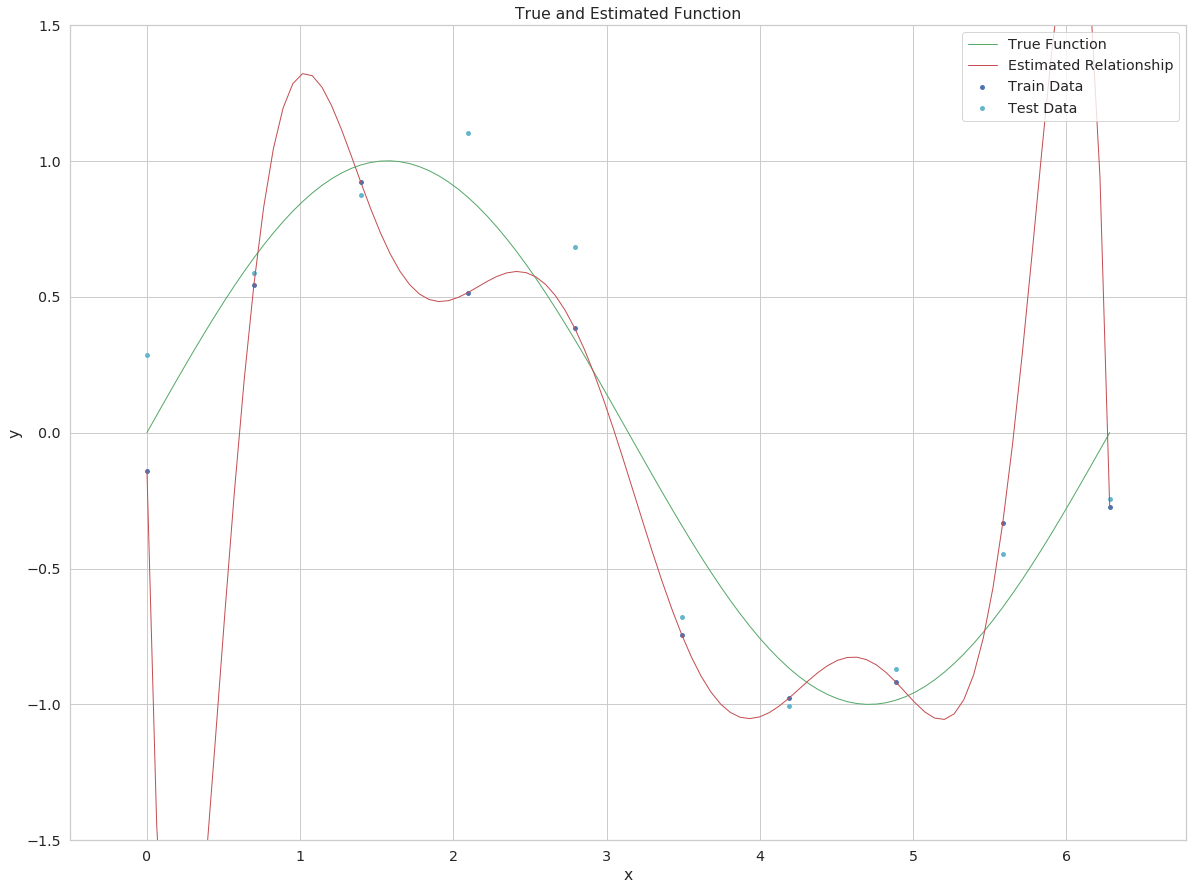

In [13]:
degree = 9
reg_coeff = 0.01

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print(poly)

print('error on train:      ', error(train.x.values, train.y.values, poly))
print('reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff))
print('error on test:       ', error(test.x.values, test.y.values, poly))
print('reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff))

_ = plt.figure(figsize=fsize)
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=linewidth, label='True Function')
_ = plt.scatter(train.x, train.y, color='b', marker='o', s=dotsize, label='Train Data')
_ = plt.scatter(test.x, test.y, color='c', marker='o', s=dotsize, label='Test Data')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=linewidth, label='Estimated Relationship')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('True and Estimated Function')
_ = plt.legend(loc='upper right')

### Error as a Function of Degree

In [14]:
degrees = range(10)
reg_coeff = 0.01
train_errors = []
train_reg_errors = []
test_errors = []
test_reg_errors = []
for i in degrees:
    pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
    poly = np.poly1d(np.polyfit(train.x.values, train.y.values, i))
    pred['y'] = pred.x.apply(poly)
    train_errors.append(error(train.x.values, train.y.values, poly))
    train_reg_errors.append(regularized_error(train.x.values, train.y.values, poly, reg_coeff))
    test_errors.append(error(test.x.values, test.y.values, poly))
    test_reg_errors.append(regularized_error(test.x.values, test.y.values, poly, reg_coeff))

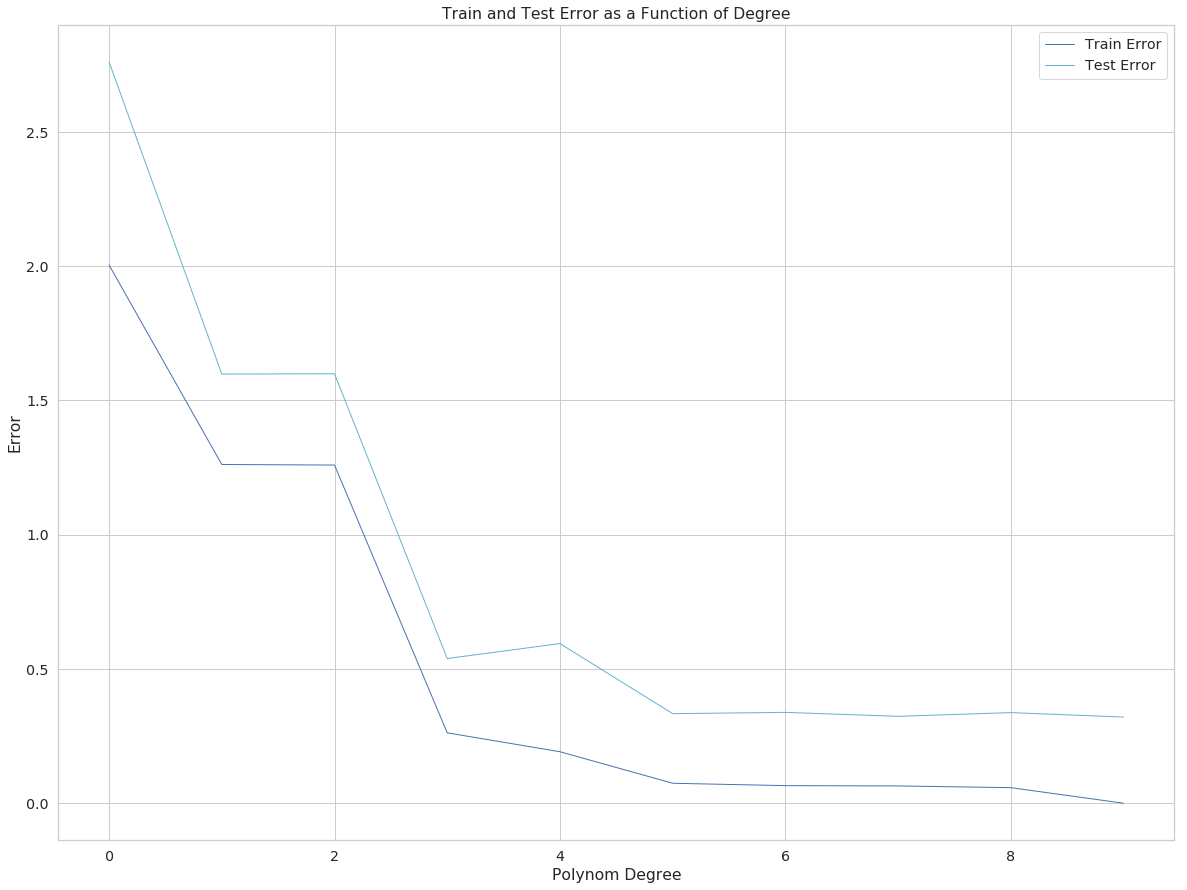

In [15]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(degrees, train_errors, 'b-', linewidth=linewidth, label='Train Error')
_ = plt.plot(degrees, test_errors, 'c-', linewidth=linewidth, label='Test Error')
_ = plt.xlabel('Polynom Degree')
_ = plt.ylabel('Error')
_ = plt.title('Train and Test Error as a Function of Degree')
_ = plt.legend(loc='upper right')

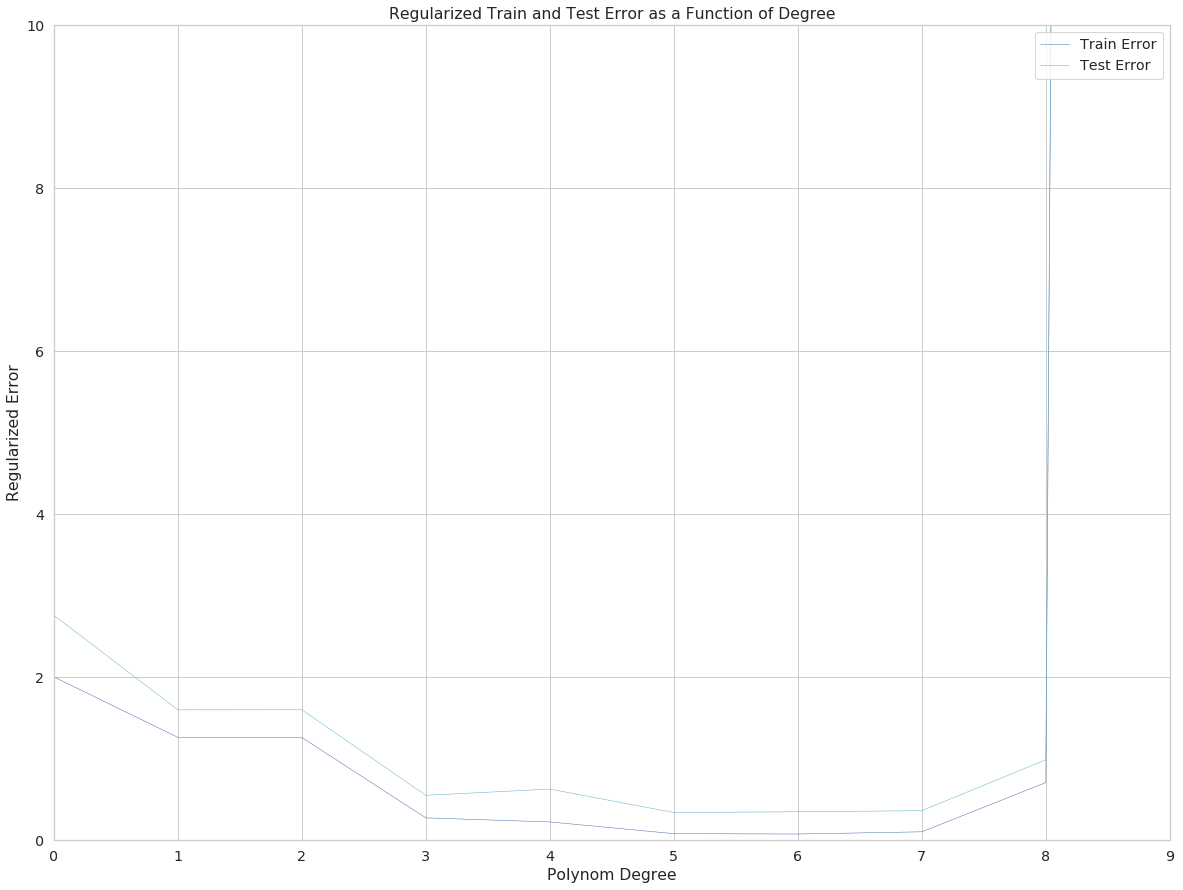

In [16]:
_ = plt.figure(figsize=fsize)
_ = plt.plot(degrees, train_reg_errors, 'b-', linewidth=0.5, label='Train Error')
_ = plt.plot(degrees, test_reg_errors, 'c-', linewidth=0.5, label='Test Error')
_ = plt.xlim((0, 9))
_ = plt.ylim((0, 10))
_ = plt.xlabel('Polynom Degree')
_ = plt.ylabel('Regularized Error')
_ = plt.title('Regularized Train and Test Error as a Function of Degree')
_ = plt.legend(loc='upper right')